<a href="https://colab.research.google.com/github/HarikrishnanK9/Tomato_Leaf_Disease_Detection/blob/main/Tomato_Leaf_CNN_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading The Dataset

In [ ]:
!cp '/content/drive/MyDrive/Tomato_Leaf/TomatoX.zip' '/content'

In [ ]:
!unzip TomatoX.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/Late_blight/9aaf4a7d-12ac-457a-a18c-1f7ea13065de___RS_Late.B 5179.JPG  
  inflating: valid/Late_blight/9afc2537-1b13-4c25-b5ed-5b8de511b0ab___GHLB2 Leaf 9033.JPG  
  inflating: valid/Late_blight/9bb49d22-976d-40c3-bc9a-bff5cbbd8e28___RS_Late.B 5057.JPG  
  inflating: valid/Late_blight/9c274db5-2f89-4f3c-b9e2-4d5ebc54ddad___GHLB2 Leaf 9096.JPG  
  inflating: valid/Late_blight/9c726f4e-045b-4080-b53d-d7e66d45bcb1___RS_Late.B 4876.JPG  
  inflating: valid/Late_blight/9e5dd34f-124c-4a64-ba9f-77c8d05faa9c___GHLB2 Leaf 8749.JPG  
  inflating: valid/Late_blight/9e633823-3dde-450c-8172-733021e4dff0___RS_Late.B 6414.JPG  
  inflating: valid/Late_blight/9ecb8001-2f48-4487-b287-535dbcfb5c2f___RS_Late.B 6206.JPG  
  inflating: valid/Late_blight/9f7dcd60-e691-4c1e-830e-7495f7cc123d___RS_Late.B 6166.JPG  
  inflating: valid/Late_blight/Bacterial_spots2276_jpg.rf.5becd3793ec2a532bf8f111d60911c63.jpg  
  inflating: valid/Late_blight

#Importing Necessary Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import matplotlib.pyplot as plt
import cv2

Checking the size of input images

In [ ]:
image = cv2.imread('/content/train/Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    length = w
    width = h
    print(f"Length x Width: {length} * {width} pixels")

Length x Width: 256 * 256 pixels


In [ ]:
input_shape = (256,256,3)  # Adjust the input shape based on your images' dimensions
num_classes = 11
batch_size = 32
epochs = 10

# Model1:
* 5 hidden layers

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values in the test set

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='categorical')



Found 25851 images belonging to 11 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
        '/content/valid',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='categorical')



Found 6683 images belonging to 11 classes.


In [ ]:
num_images_to_display = 5
category_names = {
    0: 'Bacterial_spot',
    1: 'Early_blight',
    2: 'Late_blight',
    3: 'Leaf_Mold',
    4: 'Septoria_leaf_spot',
    5: 'Spider_mites Two-spotted_spider_mite',
    6: 'Target_Spot',
    7: 'Tomato_Yellow_Leaf_Curl_Virus',
    8: 'Tomato_mosaic_virus',
    9: 'healthy',
    10: 'powdery_mildew'
}


category_images = {}
for category in category_names:
    images, _ = train_generator.next()
    category_images[category] = images


num_categories = len(category_names)


plt.figure(figsize=(10, 2 * num_categories))
for i in range(num_images_to_display):
    for category in category_names:
        plt.subplot(num_categories, num_images_to_display, category * num_images_to_display + i + 1)
        plt.imshow(category_images[category][i])
        plt.title(category_names[category])

plt.tight_layout()
plt.show()

In [ ]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size)



Epoch 1/10
807/807 [==============================] - 103s 128ms/step - loss: 0.4283 - accuracy: 0.8496 - val_loss: 0.4054 - val_accuracy: 0.8661
Epoch 2/10
807/807 [==============================] - 101s 125ms/step - loss: 0.3687 - accuracy: 0.8725 - val_loss: 0.4990 - val_accuracy: 0.8382
Epoch 3/10
807/807 [==============================] - 102s 126ms/step - loss: 0.3265 - accuracy: 0.8860 - val_loss: 0.4369 - val_accuracy: 0.8586
Epoch 4/10
807/807 [==============================] - 103s 127ms/step - loss: 0.2672 - accuracy: 0.9071 - val_loss: 0.4091 - val_accuracy: 0.8752
Epoch 5/10
807/807 [==============================] - 100s 124ms/step - loss: 0.2504 - accuracy: 0.9133 - val_loss: 0.4066 - val_accuracy: 0.8815
Epoch 6/10
807/807 [==============================] - 102s 126ms/step - loss: 0.1976 - accuracy: 0.9325 - val_loss: 0.3938 - val_accuracy: 0.8882
Epoch 7/10
807/807 [==============================] - 103s 128ms/step - loss: 0.1830 - accuracy: 0.9383 - val_loss: 0.4244 -

In [ ]:
# Save the trained model for later use
model.save('tomato_leaf_classifier_X_new1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/tomato_leaf_classifier_X_new1.h5' '/content/drive/MyDrive/Tomato_Leaf'

In [ ]:
# !cp '/content/drive/MyDrive/Tomato_Leaf/tomato_leaf_classifier_X.h5' '/content'

In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(image_path): #
    img = image.load_img(image_path,target_size = input_shape) #
    img = image.img_to_array(img) #converting to array
    img = np.expand_dims(img,axis=0)  #expanding dims to match for model
    img /=255.0 #normalize
    prediction = model.predict(img)
    predicted_leaf_index = np.argmax(prediction)

    return predicted_leaf_index

In [ ]:
img = '/content/train/healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG'

In [ ]:
# Dictionary mapping species indices to species names
species_mapping = {
    0: 'Bacterial_spot',
    1: 'Early_blight',
    2: 'Late_blight',
    3: 'Leaf_Mold',
    4: 'Septoria_leaf_spot',
    5: 'Spider_mites Two-spotted_spider_mite',
    6: 'Target_Spot',
    7: 'Tomato_Yellow_Leaf_Curl_Virus',
    8: 'Tomato_mosaic_virus',
    9: 'healthy',
   10: 'powdery_mildew'
}

# Example usage to identify the species from the predicted index
predicted_condition_index = predict_image(img)  # Replace this with the actual predicted index
predicted_condition_name = species_mapping.get(predicted_condition_index, 'Unknown Species')

print(f'Predicted species: {predicted_condition_name}')


1/1 [==============================] - 0s 28ms/step
Predicted species: healthy


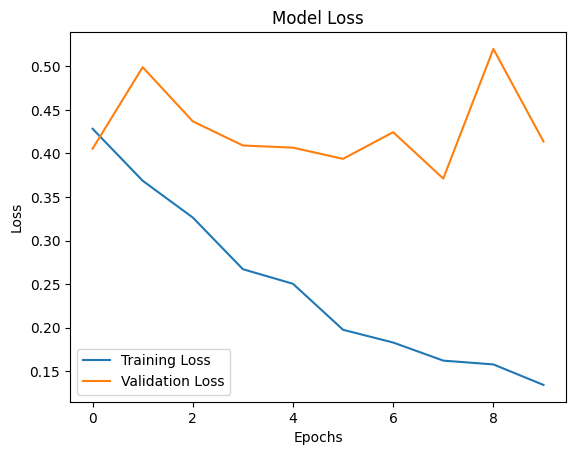

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


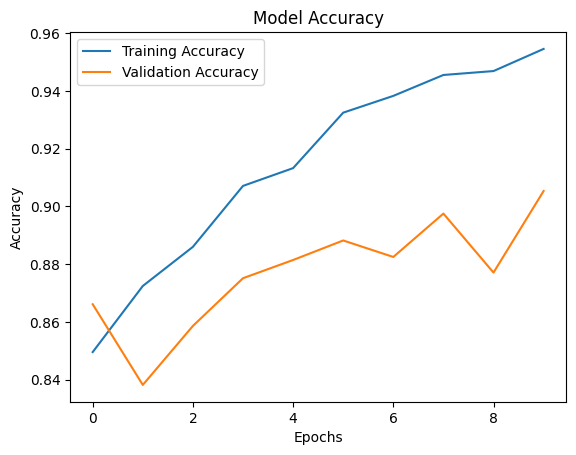

In [ ]:

# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Model2:
* vgg16(13 convolutional layers+ 3 fully connected layers)

In [ ]:
model2 = Sequential()

# Block 1
model2.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 5
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(11, activation='softmax'))  # Output layer for binary classification


In [ ]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# history2 = model2.fit(
#       train_generator,
#       steps_per_epoch=train_generator.samples // batch_size,
#       epochs=10,
#       validation_data=validation_generator,
#       validation_steps=validation_generator.samples // batch_size)

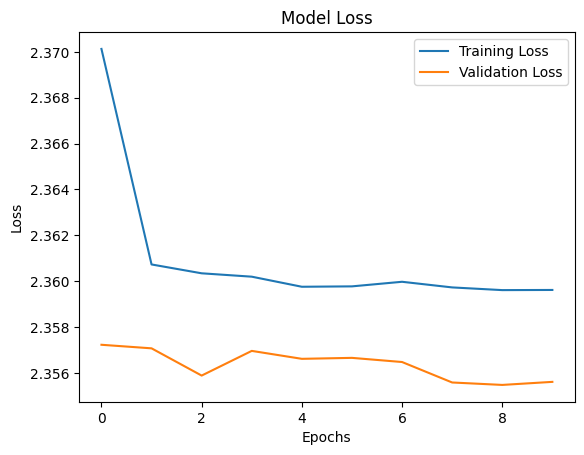

In [ ]:
plt.plot(history2.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history2.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


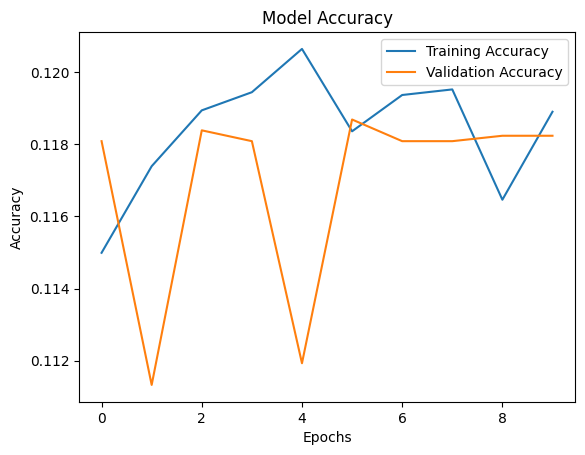

In [ ]:

# Plotting training accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Model 3:
* vgg16 with dropout and batch normalization

In [ ]:

model3 = Sequential()

# Block 1
model3.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Block 2
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Block 3
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Block 4
model3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Block 5
model3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Fully connected layers
model3.add(Flatten())
model3.add(Dense(4096, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(4096, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(11, activation='softmax'))  # Output layer for multi-class classification


In [ ]:

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history3 = model3.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
807/807 [==============================] - 314s 378ms/step - loss: 2.2337 - accuracy: 0.4746 - val_loss: 17.0054 - val_accuracy: 0.3352
Epoch 2/10
807/807 [==============================] - 307s 380ms/step - loss: 1.5247 - accuracy: 0.5839 - val_loss: 2.8710 - val_accuracy: 0.4767
Epoch 3/10
807/807 [==============================] - 308s 381ms/step - loss: 1.8443 - accuracy: 0.5476 - val_loss: 4.5538 - val_accuracy: 0.1818
Epoch 4/10
807/807 [==============================] - 312s 387ms/step - loss: 2.4342 - accuracy: 0.4138 - val_loss: 5.1565 - val_accuracy: 0.3290
Epoch 5/10
807/807 [==============================] - 316s 392ms/step - loss: 2.4701 - accuracy: 0.3880 - val_loss: 2.7081 - val_accuracy: 0.1632
Epoch 6/10
807/807 [==============================] - 313s 388ms/step - loss: 1.9091 - accuracy: 0.5116 - val_loss: 2997.9236 - val_accuracy: 0.1205
Epoch 7/10
807/807 [==============================] - 307s 380ms/step - loss: 2.6178 - accuracy: 0.3566 - val_loss: 2.35

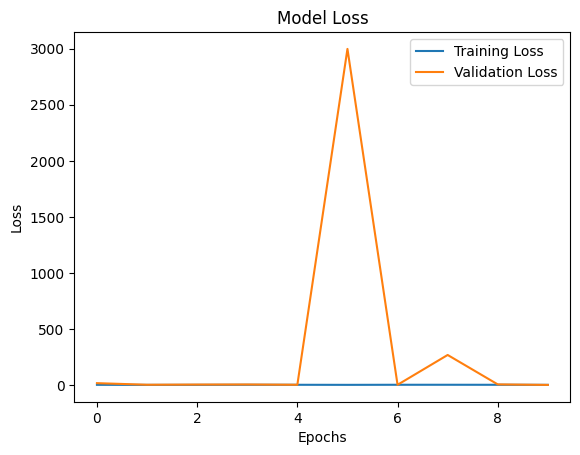

In [ ]:
plt.plot(history3.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history3.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


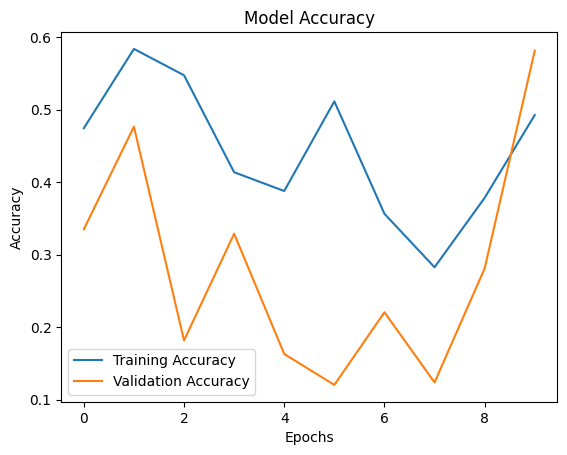

In [ ]:

# Plotting training accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Model4:
* increasing no of epochs double in 1st model

In [ ]:

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))


In [ ]:

model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history4 = model4.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size)

Epoch 1/20
807/807 [==============================] - 102s 125ms/step - loss: 1.2996 - accuracy: 0.5419 - val_loss: 0.8263 - val_accuracy: 0.7090
Epoch 2/20
807/807 [==============================] - 100s 124ms/step - loss: 0.7544 - accuracy: 0.7350 - val_loss: 0.5901 - val_accuracy: 0.7945
Epoch 3/20
807/807 [==============================] - 106s 131ms/step - loss: 0.5834 - accuracy: 0.7996 - val_loss: 0.4981 - val_accuracy: 0.8263
Epoch 4/20
807/807 [==============================] - 102s 126ms/step - loss: 0.4663 - accuracy: 0.8379 - val_loss: 0.3983 - val_accuracy: 0.8633
Epoch 5/20
807/807 [==============================] - 102s 126ms/step - loss: 0.3748 - accuracy: 0.8699 - val_loss: 0.3995 - val_accuracy: 0.8676
Epoch 6/20
807/807 [==============================] - 102s 127ms/step - loss: 0.3068 - accuracy: 0.8955 - val_loss: 0.3571 - val_accuracy: 0.8843
Epoch 7/20
807/807 [==============================] - 98s 121ms/step - loss: 0.2611 - accuracy: 0.9096 - val_loss: 0.3848 - 

In [ ]:
# Save the trained model for later use
model4.save('tomato_leaf_classifier_X3_new2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/tomato_leaf_classifier_X3_new2.h5' '/content/drive/MyDrive/Tomato_Leaf'

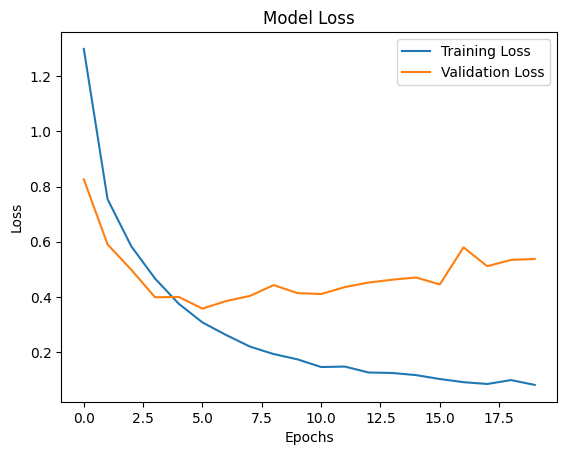

In [ ]:
plt.plot(history4.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history4.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


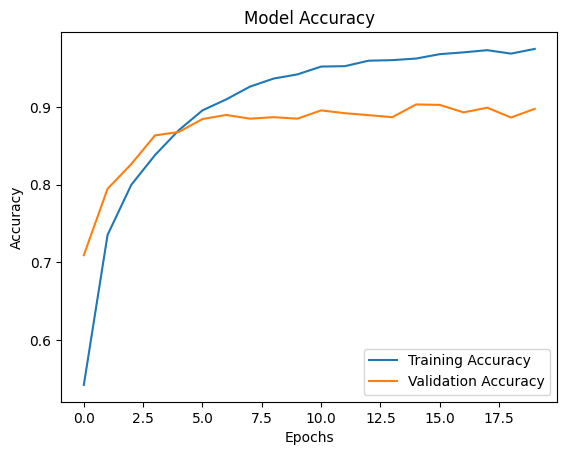

In [ ]:

# Plotting training accuracy
plt.plot(history4.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Model5:
* Again increasing the no of epochs
* Also setting earlystopping

In [ ]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Assuming 'model4' is your model
history4_1 = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping])  # Pass the EarlyStopping callback to the 'callbacks' parameter


Epoch 1/30
807/807 [==============================] - 124s 153ms/step - loss: 0.0827 - accuracy: 0.9739 - val_loss: 0.5565 - val_accuracy: 0.9035
Epoch 2/30
807/807 [==============================] - 129s 160ms/step - loss: 0.0672 - accuracy: 0.9786 - val_loss: 0.4984 - val_accuracy: 0.9043
Epoch 3/30
807/807 [==============================] - 108s 134ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.6214 - val_accuracy: 0.8873
Epoch 4/30
807/807 [==============================] - 107s 132ms/step - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.5522 - val_accuracy: 0.8987
Epoch 5/30
807/807 [==============================] - 98s 122ms/step - loss: 0.0736 - accuracy: 0.9770 - val_loss: 0.4911 - val_accuracy: 0.9072
Epoch 6/30
807/807 [==============================] - 101s 125ms/step - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.6091 - val_accuracy: 0.8875
Epoch 7/30
807/807 [==============================] - 98s 122ms/step - loss: 0.0697 - accuracy: 0.9788 - val_loss: 0.6231 - v

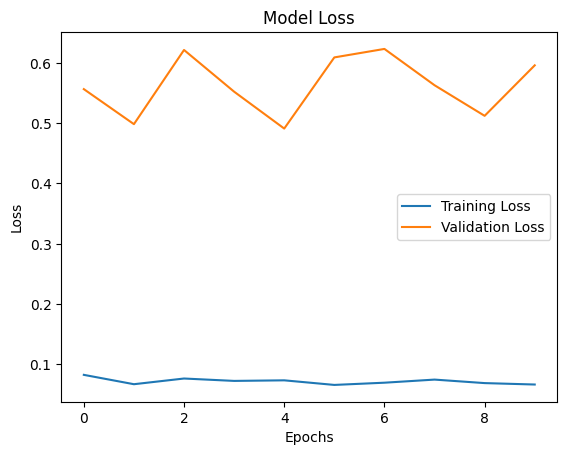

In [ ]:
plt.plot(history4_1.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history4_1.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


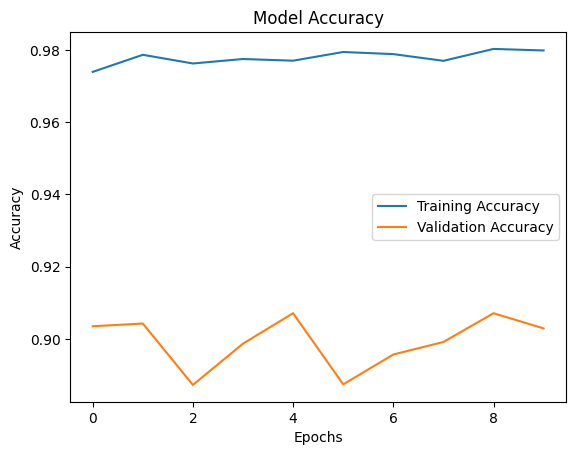

In [ ]:

# Plotting training accuracy
plt.plot(history4_1.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history4_1.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
